today topic is related with python.

it's totally my pure curiosity as learning new computer languge. 

It might not help to you guys and i'm sure you don't need to know during developing 

i would like to start why i choose this topic.

first, i wanna share our studying with fluent python book

fluent python
2019년 9월 ~ 2020년 1월 (one day a week, totally 5 months or about 20 days) 
the book has 21 chapter with 600 pages (without appendix and table) totally 766

schedule table devied by pages (always flexable and put many days off) 
https://docs.google.com/spreadsheets/d/1y-K7Jj2iSz_Vje894wbIDdy3Q3DwsYYuJPZJpjqOWCw/edit#gid=0


Data Model was the first chapter but i couldn't get it. so I kept searching on and on. and i found the metadata concept. 
and finally, i kept some blogs explaining what happens inside python and i decided to read them if i got bored while free time.

my past 5 months never get boring so i didn't have the tiem to read them even during seolnal too. 
finally i started to read them last week after.

and i would like to share one of them with you.

http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/


what is cpython 

https://stackoverflow.com/questions/17130975/python-vs-cpython

CPython happens to be implemented in C. That is just an implementation detail, really. CPython compiles your Python code into bytecode (transparently) and interprets that bytecode in a evaluation loop. So CPython does not translate your Python code to C by itself. 

Separately we have **a programming language implementation** which in most cases, is the actual interpreter or compiler.

1. **Python**: It is a language, it only states/describes how to convey/express yourself to the interpreter (the program which accepts your python code).
2. **Implementation**: It is all about how the interpreter was written, specifically, in what language and what it ends up doing.
3. **Bytecode**: It is the code that is processed by a program, usually referred to as a virtual machine, rather than by the "real" computer machine, the hardware processor.

<img src=https://i.imgur.com/PJME67T.png>

source : https://indianpythonista.wordpress.com/2018/01/04/how-python-runs/

In [3]:
import sys
print(sys.version[:5])

3.6.8


In [5]:
x = 42
x

42

## Integer Type

In [7]:
import ctypes

```c
struct _longobject{
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};```

In [40]:
class IntStruct(ctypes.Structure):
    _fields_ = [("ob_ref", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong),
                ("ob_digit", ctypes.c_long),
               ]
    
    def __repr__(self):
        return ("IntStruct(ob_digit={self.ob_digit}, refcount={self.ob_ref})").format(self=self)

In [41]:
num = 42
IntStruct.from_address(id(42))

IntStruct(ob_digit=42, refcount=353)

In [42]:
id(42)

10915808

https://docs.python.org/2/library/ctypes.html#ctypes._CData.from_address

**from_address(address)**
> This method returns a ctypes type instance using the memory specified by address which must be an integer.

In [43]:
Istruct = IntStruct.from_address(id(42))
Istruct.ob_type, Istruct.ob_size, Istruct.ob_digit

(10277248, 1, 42)

In [39]:
type(Istruct)

__main__.IntStruct

Text(0, 0.5, 'reference count')

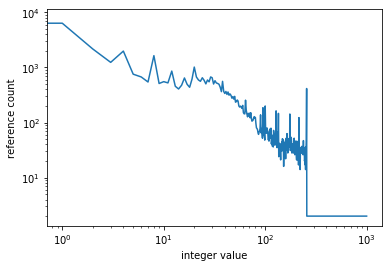

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
plt.loglog(range(1000), [sys.getrefcount(i) for i in range(1000)])
plt.xlabel('integer value')
plt.ylabel('reference count')

## List Type

```c
typedef struct{
    long ob_refcnt;
    PyTypeObject *ob_type;
    Pyssize_t ob_size;
    PyObject **ob_item;
    long allocated;    
}PyListObject;
```

In [16]:
class ListStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_size", ctypes.c_ulong), 
                ("ob_item", ctypes.c_long),# pyObject** pointer cast to long
                ("ob_digit", ctypes.c_long),
               ]
    
    def __repr__(self):
        return ("ListStruct(len={self.ob_size}, refcount={self.ob_refcnt})").format(self=self)

In [17]:
L = [1,2,3,4,5]
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=1)

In [18]:
tup = [L, L]
ListStruct.from_address(id(L))

ListStruct(len=5, refcount=3)

In [19]:
del L[4]

In [20]:
L

[1, 2, 3, 4]

In [46]:
listStruct = ListStruct.from_address(id(L))
listStruct.ob_size, listStruct.ob_item, listStruct.ob_digit

(4, 140053468754968, 5)

In [47]:
tup[1]

[1, 2, 3, 4]

In [48]:
id(L)

140053469547208

## Numpy List

In [24]:
class NumpyStruct(ctypes.Structure):
    _fields_ = [("ob_refcnt", ctypes.c_long),
                ("ob_type", ctypes.c_void_p),
                ("ob_data", ctypes.c_long), # char* pointer cas to long
                ("ob_ndim", ctypes.c_int),
                ("ob_shape", ctypes.c_voidp),
                ("ob_strides", ctypes.c_voidp),
               ]
    @property
    def shape(self):
        return tuple((self.ob_ndim*ctypes.c_int64).from_address(self.ob_shape))
    
    @property
    def strides(self):
        return tuple((self.ob_ndim*ctypes.c_int64).from_address(self.ob_strides))
    
    
    def __repr__(self):
        return ("NumpyStruct(shape={self.shape}, refcount={self.ob_refcnt})").format(self=self)

In [26]:
ctypes.c_int64

__main__.c_long_Array_1

In [29]:
ctypes.c_int

ctypes.c_int